In [1]:
import sys
sys.path.append('../GNEMS')
from GNEMS import GraphicallyGuidedEMSegmentor, GNEMS_segment
import matplotlib.pyplot as plt
import torch

/Users/isaac/miniforge3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(0.5547)


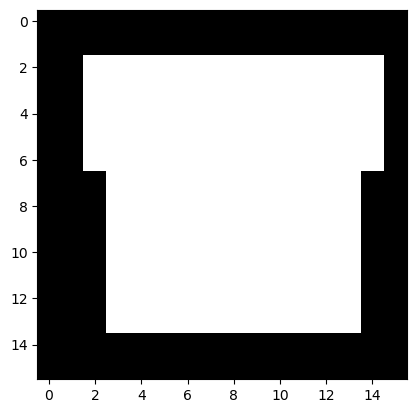

In [5]:
def initial_labels(n, proportion=0.5):
    labels = torch.zeros(n)
    labels = labels.reshape(int(n**0.5), int(n**0.5))
    # locate center coordinates
    centerX = int(n**0.5/2)
    centerY = int(n**0.5/2)
    # set center to 1
    labels[centerX, centerY] = 1
    # grow from center until proportion is reached. Make fine grained
    while labels.sum() < proportion*n:
        labels_inter = torch.nn.functional.conv2d(labels.reshape(1, 1, int(n**0.5), int(n**0.5)), torch.ones(1, 1, 3, 3), padding=1)
        labels_inter = labels_inter.reshape(n)
        labels = labels.reshape(n)
        candidates = labels_inter > 0
        for i,candidate in enumerate(candidates):
            if candidate:
                labels[i] = 1
                if labels.sum() > proportion*n:
                    break
        labels = labels.reshape(int(n**0.5), int(n**0.5))
    labels = labels.reshape(n)
    return labels

labels = initial_labels(16**2, proportion=0.554)
plt.imshow(labels.reshape(16, 16), cmap='gray')
print(sum(labels)/len(labels))
